# Привет

## Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.1)

df = pd.read_csv("/content/churn.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


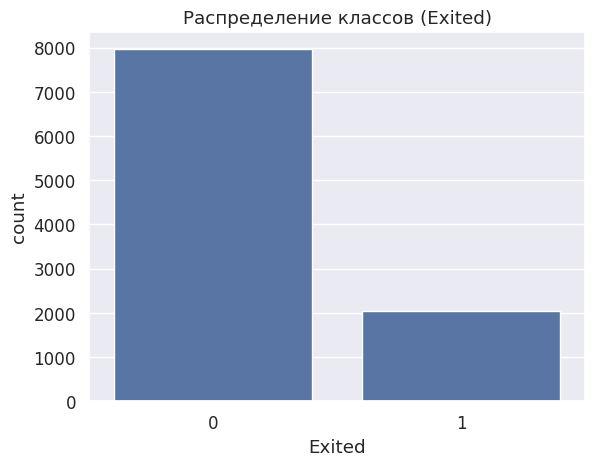

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
sns.countplot(data=df, x="Exited")
plt.title("Распределение классов (Exited)")
plt.show()

df["Exited"].value_counts(normalize=True)


## Распределение по полу и стране

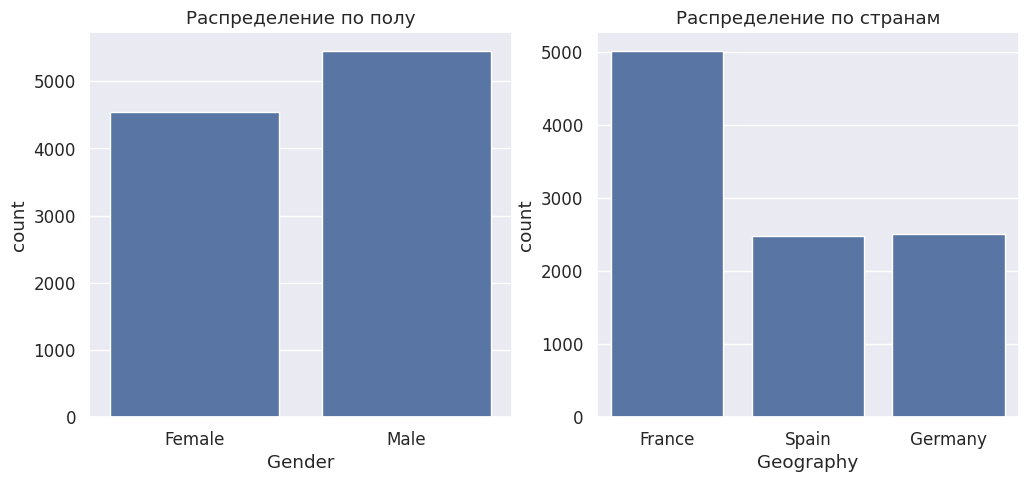

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x="Gender", ax=axes[0])
axes[0].set_title("Распределение по полу")

sns.countplot(data=df, x="Geography", ax=axes[1])
axes[1].set_title("Распределение по странам")

plt.show()


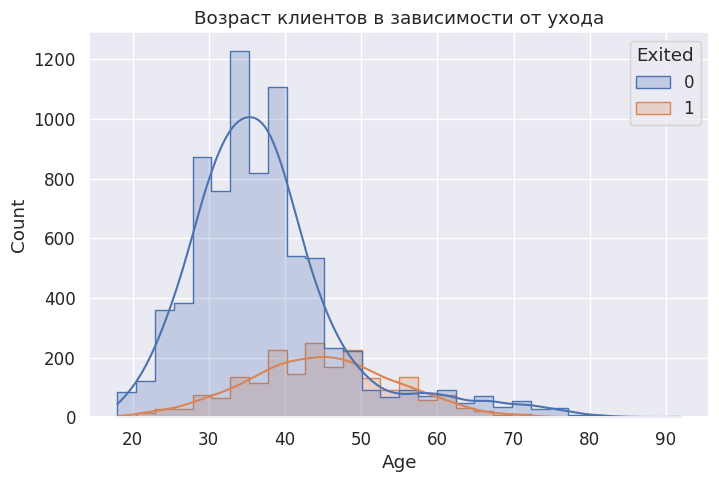

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Exited", bins=30, kde=True, element="step")
plt.title("Возраст клиентов в зависимости от ухода")
plt.show()


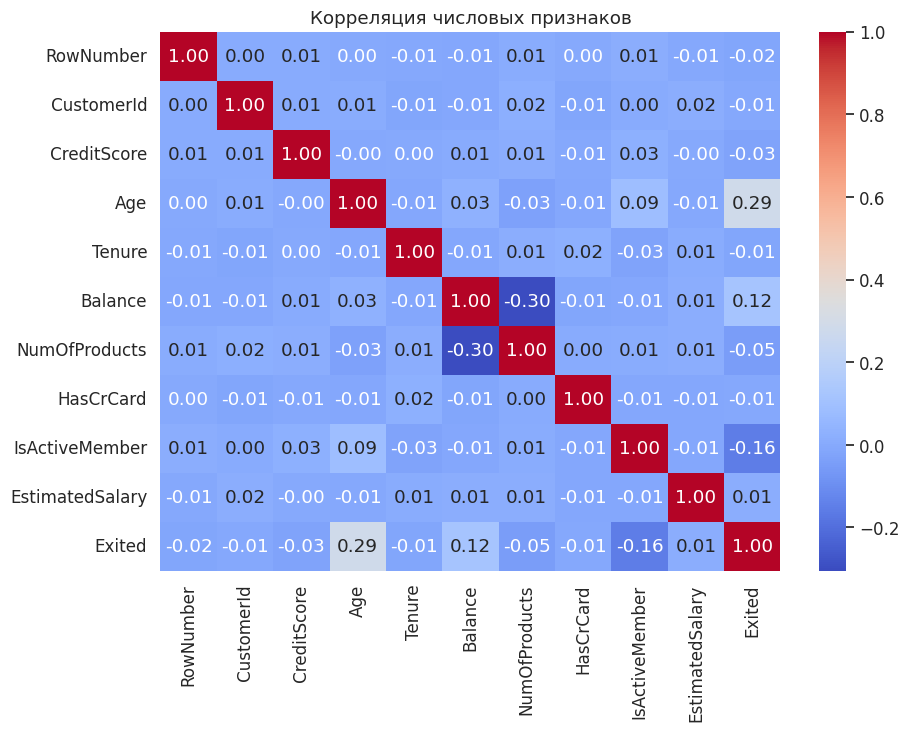

In [ ]:
plt.figure(figsize=(10, 7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция числовых признаков")
plt.show()


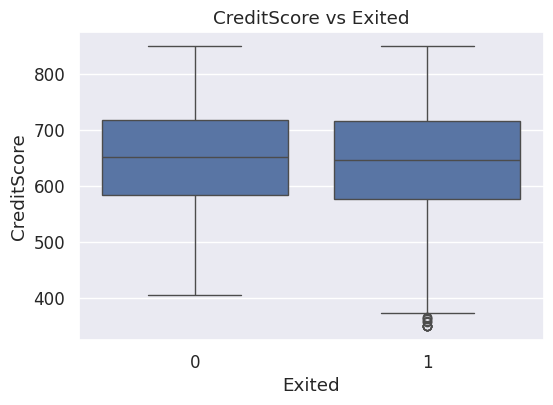

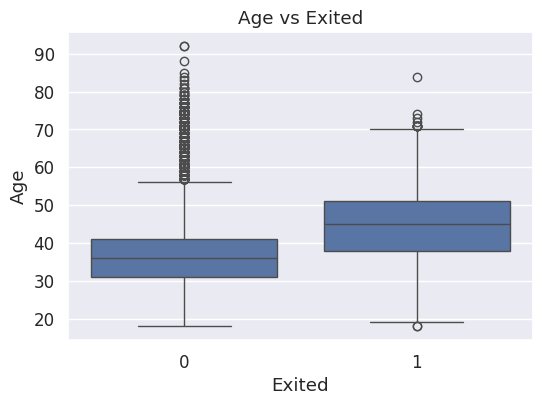

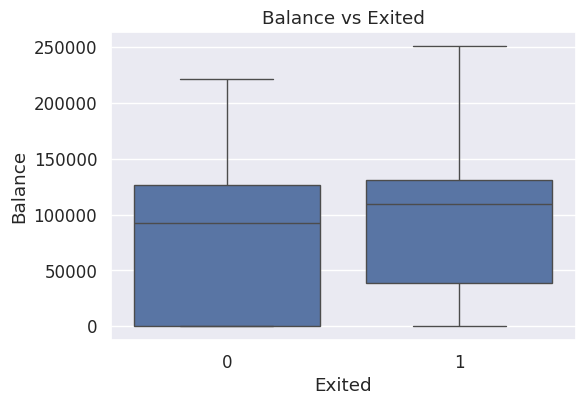

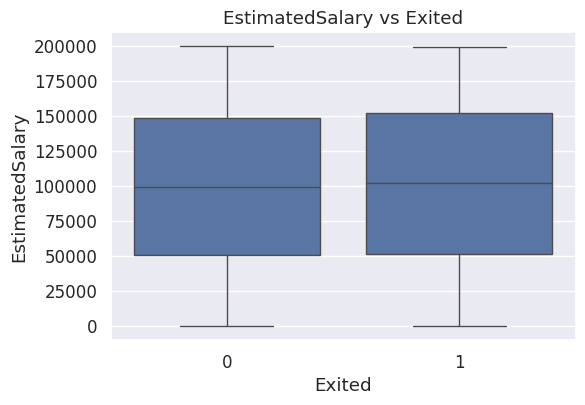

In [ ]:
numeric_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="Exited", y=col)
    plt.title(f"{col} vs Exited")
    plt.show()


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


## Подготовка данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = df["Exited"]
X = df.drop(columns=["Exited", "RowNumber", "CustomerId", "Surname"], errors="ignore")

cat_features = X.select_dtypes(include=["object"]).columns.tolist()

for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((8000, 10), (2000, 10))

## Обучение CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=None)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


0:	test: 0.8077654	best: 0.8077654 (0)	total: 53ms	remaining: 15.8s
100:	test: 0.8670998	best: 0.8723793 (56)	total: 1.75s	remaining: 3.44s
200:	test: 0.8599339	best: 0.8723793 (56)	total: 3.2s	remaining: 1.58s
299:	test: 0.8513336	best: 0.8723793 (56)	total: 4.29s	remaining: 0us

bestTest = 0.8723793131
bestIteration = 56

Shrink model to first 57 iterations.
ROC-AUC: 0.8723793130572792
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.83      0.47      0.60       407

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.87      0.87      0.86      2000



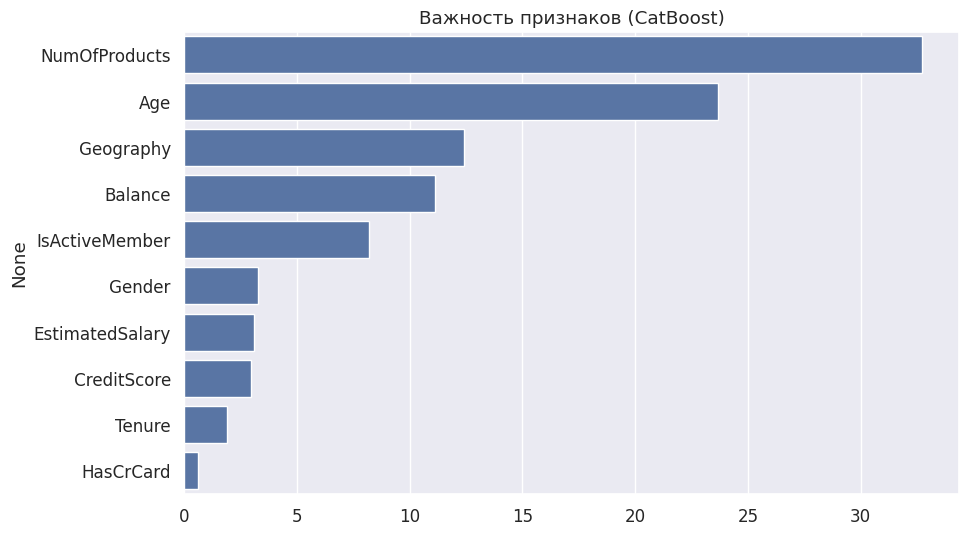

In [ ]:
import numpy as np

feature_importances = model.get_feature_importance()
features = X.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.title("Важность признаков (CatBoost)")
plt.show()
